<a href="https://colab.research.google.com/github/leanguzman/Filmografia-estadounidense-1900-2018-vf/blob/main/ProyectoDS_ParteII_Guzm%C3%A1n_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCCION





# FUENTE


El dataset fue descargado de la plataforma Kaggle (https://www.kaggle.com/).

#IMPORTACION DE LIBRERIAS

In [ ]:
import pandas as pd  # Manipulación y análisis de datos
import numpy as np  # Cálculos numéricos
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Gráficos avanzados y estéticos
!pip install openpyxl # Permite leer y escribir archivos de Excel

# CARGA DE DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gdown

file_id = '1NWrJWg0DxR7bQj7ne8YjfB7RXxXJ6GIZ'
download_link = f'https://drive.google.com/uc?id={file_id}'
output = 'archivo.xlsx'
gdown.download(download_link, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1NWrJWg0DxR7bQj7ne8YjfB7RXxXJ6GIZ
To: /content/archivo.xlsx
100%|██████████| 20.0M/20.0M [00:00<00:00, 139MB/s] 


'archivo.xlsx'

#LECTURA DE DATASET

In [ ]:
# Leer el archivo Excel desde Google Drive
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Dataset - VF 4.xlsx')
# Mostrar las primeras filas
print(df.head())

   ID  PRESUPUESTO                           GÉNEROS    IMDB_ID  \
0   1      4000000                      Crime|Comedy  tt0113101   
1   2            0             Action|Thriller|Crime  tt0107286   
2   3        42000                       Documentary  tt0825671   
3   4     11000000  Adventure|Action|Science Fiction  tt0076759   
4   5     94000000                  Animation|Family  tt0266543   

  IDIOMA ORIGINAL   POPULARIDAD FECHA DE LANZAMIENTO   INGRESOS  DURACIÓN  \
0              en  1.698000e+03  1995-12-25 00:00:00    4300000      98.0   
1              en  1.322870e+05  1993-10-15 00:00:00   12136938     110.0   
2              en  5.471600e-02  2006-01-01 00:00:00          0      80.0   
3              en  1.049261e+07  1977-05-25 00:00:00  775398007     121.0   
4              en  9.915573e+06  2003-05-30 00:00:00  940335536     100.0   

     ESTADO                   TÍTULO ORIGINAL  VOTACIÓN PROMEDIO  VOTOS  \
0  Released                        Four Rooms              

# DESCRIPCION DE DATASET

El dataset contiene información detallada sobre las películas estadounidenses, estrenadas entre 1900 y 2018.

El detalle de cada campo es el siguiente:

1. ID: Identificador único de la película.
2. PRESUPUESTO: Presupuesto de producción en dólares.
3. GÉNEROS: Géneros de la película
4. IMDB_ID: Identificador de la película en IMDb.
5. IDIOMA ORIGINAL: Idioma original de la película.
6. POPULARIDAD : Una métrica de popularidad.
7. FECHA DE LANZAMIENTO: Fecha de lanzamiento.
8. INGRESOS: Ingresos en dólares.
8. DURACIÓN: Duración de la película en minutos.
10. ESTADO: Estado de la película (por ejemplo, "Estrenada").
11. TÍTULO: Título de la película.
12. VOTACIÓN PROMEDIO: Promedio de calificaciones.
13. VOTOS: Número de votos.
14. NUMERO DE COMPAÑÍAS PRODUCTORAS: Número de compañías productoras involucradas.
15. NUMERO DE IDIOMAS HABLADOS: Número de idiomas hablados en la película.



# AUDIENCIA DIRIGIDA

Este análisis fue desarrollado para ser presentado como parte de la tesis de la carrera de Licenciatura en
Dirección Cinematográfica, de la Universidad de Palermo (http://bit.ly/4ar9pt8).




# EXPLORACION DE DATOS

In [ ]:
print(df.columns)

Index(['ID', 'PRESUPUESTO', 'GÉNEROS', 'IMDB_ID', 'IDIOMA ORIGINAL',
       'POPULARIDAD', 'FECHA DE LANZAMIENTO', 'INGRESOS', 'DURACIÓN', 'ESTADO',
       'TÍTULO ORIGINAL', 'VOTACIÓN PROMEDIO', 'VOTOS',
       'NUMERO DE COMPAÑÍAS PRODUCTORAS', 'NUMERO DE IDIOMAS HABLADOS'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216831 entries, 0 to 216830
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               216831 non-null  int64  
 1   PRESUPUESTO                      216831 non-null  int64  
 2   GÉNEROS                          126309 non-null  object 
 3   IMDB_ID                          166025 non-null  object 
 4   IDIOMA ORIGINAL                  216831 non-null  object 
 5   POPULARIDAD                      209620 non-null  float64
 6   FECHA DE LANZAMIENTO             199548 non-null  object 
 7   INGRESOS                         216831 non-null  int64  
 8   DURACIÓN                         216193 non-null  float64
 9   ESTADO                           215293 non-null  object 
 10  TÍTULO ORIGINAL                  216830 non-null  object 
 11  VOTACIÓN PROMEDIO                216831 non-null  float64
 12  VO

In [ ]:
df.describe()

,ID,PRESUPUESTO,INGRESOS,DURACIÓN,VOTACIÓN PROMEDIO,VOTOS,NUMERO DE COMPAÑÍAS PRODUCTORAS,NUMERO DE IDIOMAS HABLADOS
count,216831.000000,2.168310e+05,2.168310e+05,216193.000000,216831.000000,216831.000000,216831.000000,216831.000000
mean,108416.000000,8.588301e+05,2.221972e+06,57.065516,2.289438,19.390687,0.539466,0.561285
std,62593.862447,8.203280e+06,2.936551e+07,133.507371,3.081376,202.887753,0.974574,0.665748
min,1.000000,0.000000e+00,-1.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54208.500000,0.000000e+00,0.000000e+00,4.000000,0.000000,0.000000,0.000000,0.000000
50%,108416.000000,0.000000e+00,0.000000e+00,60.000000,0.000000,0.000000,0.000000,0.000000
75%,162623.500000,0.000000e+00,0.000000e+00,91.000000,5.300000,1.000000,1.000000,1.000000
max,216831.000000,4.000000e+08,2.781506e+09,51420.000000,10.000000,12811.000000,26.000000,19.000000


In [ ]:
df.GÉNEROS.unique()

array(['Drama|Crime', 'Drama|Comedy', 'Crime|Comedy', ...,
       'Drama|Thriller|Family', 'Comedy|Family|Adventure|Fantasy',
       'Fantasy|Comedy|Animation|Family'], dtype=object)

In [ ]:
df["ESTADO"].unique()

array(['Released', 'Planned', 'In Production', 'Rumored', 'Canceled',
       'Post Production', nan], dtype=object)

# HIPOTESIS

## HIPOTESIS 1

**Relación entre presupuesto y popularidad/recaudación**

Hipótesis: Películas con presupuestos más altos tienden a ser más populares y generan mayores ingresos en dolares en taquilla.

## HIPOTESIS 2

**Fecha de lanzamiento y éxito comercial**

Las películas lanzadas en fechas cercanas a Navidad o verano tienden a generar más ingresos en taquilla.

## HIPOTESIS 3

**Popularidad frente a críticas**

Las películas más populares no siempre tienen las mejores calificaciones promedio, lo que sugiere una posible desconexión entre éxito comercial y calidad percibida por los criticos.

## HIPOTESIS 4

**Géneros y recaudación**

Los géneros Acción (Action) y Aventura (Adventure) generan mayores ingresos en taquilla que los de Drama (Drama) o Ciencia Ficción (Science Fiction).

#ANALISIS 1

##PREPARACION PARA EL ANALISIS

In [ ]:
print(df[['PRESUPUESTO', 'POPULARIDAD']].dtypes) #


PRESUPUESTO     int64
POPULARIDAD    object
dtype: object


In [ ]:
df['POPULARIDAD'] = pd.to_numeric(df['POPULARIDAD'], errors='coerce')


In [ ]:
# Configuración opcional para gráficos
sns.set(style="darkgrid")  # Estilo visual de gráficos

##GRAFICOS

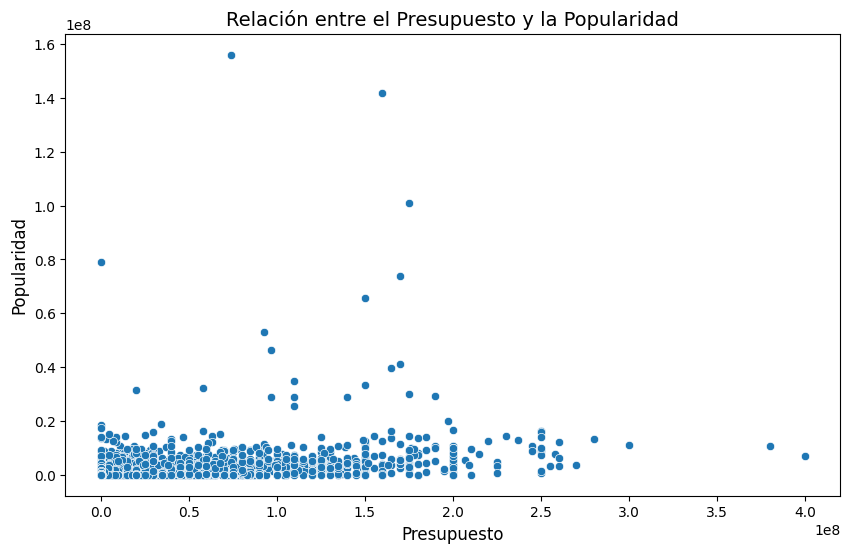

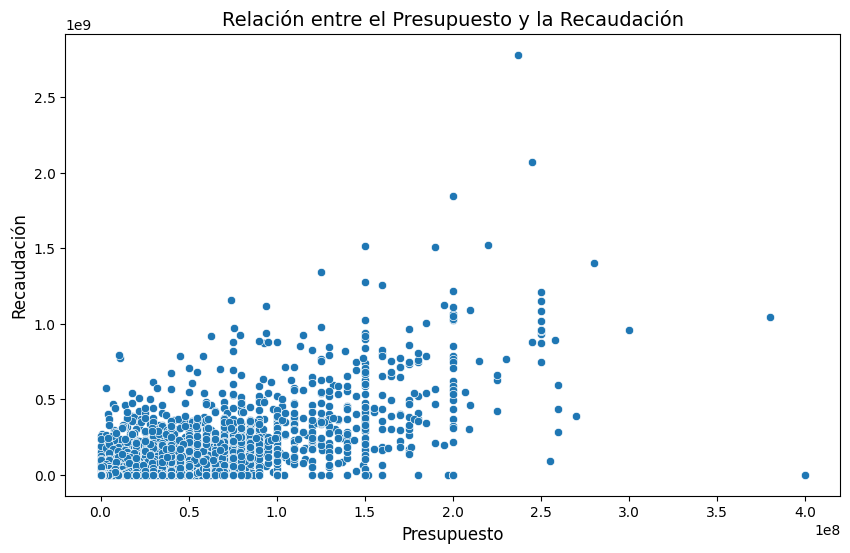

In [ ]:
# Relación entre 'PRESUPUESTO' y 'POPULARIDAD'
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.scatterplot(data=df, x='PRESUPUESTO', y='POPULARIDAD')

# Títulos y etiquetas
plt.title("Relación entre el Presupuesto y la Popularidad", fontsize=14)
plt.xlabel("Presupuesto", fontsize=12)
plt.ylabel("Popularidad", fontsize=12)

# Mostrar gráfico
plt.show()

# Relación entre 'PRESUPUESTO' y 'RECAUDACIÓN (INGRESOS)'
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.scatterplot(data=df, x='PRESUPUESTO', y='INGRESOS')

# Títulos y etiquetas
plt.title("Relación entre el Presupuesto y la Recaudación", fontsize=14)
plt.xlabel("Presupuesto", fontsize=12)
plt.ylabel("Recaudación", fontsize=12)

# Mostrar gráfico
plt.show()

##DIAGNOSTICO

Analizaremos la hipotesis en 2 partes:

1. RELACION PRESUPUESTO VS POPULARIDAD: no se ha comprobado que a mayor presupuesto, mayor popularidad. Como se observa en el grafico, en el margen de presupuesto entre 0 y 2.5 millones, la popularidad fluctua de manera constante entre 0 y 0.2 millones.

2. RELACION PRESUPUESTO VS RECAUDACION: tampoco se ha evidenciado que a mayor presupuesto, su contraparte es una mayor recaudacion. Dado que se visualiza que en el presupuesto comprendido entre 0 y 2.5 millones, la recaudacion se mueve en su mayoria en el rango constante entre 0 y 1 millones.

#ANALISIS 2

##PREPARACION PARA EL ANALISIS


In [ ]:
# Convertir la columna de fecha a datetime, ignorando los errores de conversión
df['FECHA DE LANZAMIENTO'] = pd.to_datetime(df['FECHA DE LANZAMIENTO'], errors='coerce')

# Verificar si después de la conversión tenemos valores nulos
print(df['FECHA DE LANZAMIENTO'].isnull().sum())

# Eliminar las filas con fechas nulas
df = df.dropna(subset=['FECHA DE LANZAMIENTO'])

# Verificar
print(df.isnull().sum())

0
ID                                     0
PRESUPUESTO                            0
GÉNEROS                            76595
IMDB_ID                            41244
IDIOMA ORIGINAL                        0
POPULARIDAD                            0
FECHA DE LANZAMIENTO                   0
INGRESOS                               0
DURACIÓN                             495
ESTADO                              1274
TÍTULO ORIGINAL                        1
VOTACIÓN PROMEDIO                      0
VOTOS                                  0
NUMERO DE COMPAÑÍAS PRODUCTORAS        0
NUMERO DE IDIOMAS HABLADOS             0
dtype: int64


In [ ]:
# Crear una nueva columna para la temporada
def clasificar_temporada(fecha):
    mes = fecha.month
    if mes in [6, 7, 8]:  # Verano (junio, julio, agosto)
        return 'Verano'
    elif mes == 12:  # Navidad (diciembre)
        return 'Navidad'
    else:
        return 'Otras Fechas'

df['TEMPORADA'] = df['FECHA DE LANZAMIENTO'].apply(clasificar_temporada)

# Verificar la nueva columna
df[['FECHA DE LANZAMIENTO', 'TEMPORADA']].head(20)


,FECHA DE LANZAMIENTO,TEMPORADA
0,1995-12-25,Navidad
1,1993-10-15,Otras Fechas
2,2006-01-01,Otras Fechas
3,1977-05-25,Otras Fechas
4,2003-05-30,Otras Fechas
5,1994-07-06,Verano
6,1999-09-15,Otras Fechas
7,1941-04-30,Otras Fechas
8,2000-05-17,Otras Fechas
9,2006-01-26,Otras Fechas


In [ ]:
# Agrupar por temporada y calcular el ingreso promedio
ingresos_promedio = df.groupby('TEMPORADA')['INGRESOS'].mean().reset_index()

# Redondear los ingresos a 2 decimales
ingresos_promedio['INGRESOS'] = ingresos_promedio['INGRESOS']

# Ver el resultado
print(ingresos_promedio)


      TEMPORADA      INGRESOS
0       Navidad  4.605448e+06
1  Otras Fechas  1.836667e+06
2        Verano  3.928975e+06


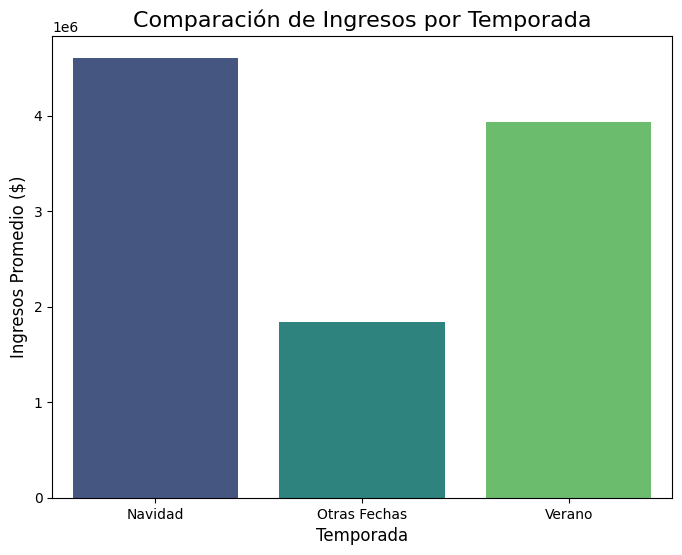

In [ ]:
# Configuración para el gráfico
plt.figure(figsize=(8, 6))
sns.barplot(data=ingresos_promedio, x='TEMPORADA', y='INGRESOS', hue='TEMPORADA', palette='viridis', legend=False)

# Títulos y etiquetas
plt.title('Comparación de Ingresos por Temporada', fontsize=16)
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Ingresos Promedio ($)', fontsize=12)

# Mostrar gráfico
plt.show()

##DIAGNOSTICO

En sintonia con la hipotesis, se convalida que en epoca navidena y veraniega (considerando el hemisferio norte), los ingresos en taquilla en promedio son mayores a los del resto del ano.

#ANALISIS 3

##PREPARACION PARA EL ANALISIS

In [ ]:
#PASO 1

# Definir la función de clasificación
def clasificar_popularidad(popularidad):
    if popularidad > 80:
        return 'Alta'
    elif popularidad > 50:
        return 'Media'
    else:
        return 'Baja'

# Aplicar la función de clasificación
df['rango_popularidad'] = df['POPULARIDAD'].apply(clasificar_popularidad)

# Mostrar las primeras filas del DataFrame con la nueva columna
print("\nDataFrame con la columna 'rango_popularidad':")
print(df.head())

# Ver los valores únicos de la columna 'POPULARIDAD' para comprobar el rango
print(df['POPULARIDAD'].describe())


DataFrame con la columna 'rango_popularidad':
   ID  PRESUPUESTO                           GÉNEROS    IMDB_ID  \
0   1      4000000                      Crime|Comedy  tt0113101   
1   2            0             Action|Thriller|Crime  tt0107286   
2   3        42000                       Documentary  tt0825671   
3   4     11000000  Adventure|Action|Science Fiction  tt0076759   
4   5     94000000                  Animation|Family  tt0266543   

  IDIOMA ORIGINAL   POPULARIDAD FECHA DE LANZAMIENTO   INGRESOS  DURACIÓN  \
0              en  1.698000e+03  1995-12-25 00:00:00    4300000      98.0   
1              en  1.322870e+05  1993-10-15 00:00:00   12136938     110.0   
2              en  5.471600e-02  2006-01-01 00:00:00          0      80.0   
3              en  1.049261e+07  1977-05-25 00:00:00  775398007     121.0   
4              en  9.915573e+06  2003-05-30 00:00:00  940335536     100.0   

     ESTADO                   TÍTULO ORIGINAL  VOTACIÓN PROMEDIO  VOTOS  \
0  Released 

In [ ]:
#PASO 2

# Verificar el rango de los valores de popularidad
print(df['POPULARIDAD'].describe())

# Definir percentiles para clasificar las películas
percentile_25 = df['POPULARIDAD'].quantile(0.25)
percentile_75 = df['POPULARIDAD'].quantile(0.75)

# Clasificar las películas según los percentiles de popularidad
def clasificar_popularidad(puntuacion):
    if puntuacion >= percentile_75:
        return 'Alta'
    elif puntuacion >= percentile_25:
        return 'Media'
    else:
        return 'Baja'

# Aplicar la función de clasificación
df['rango_popularidad'] = df['POPULARIDAD'].apply(clasificar_popularidad)

# Verificar la distribución de las categorías de popularidad
print(df['rango_popularidad'].value_counts())

count    1.995270e+05
mean     7.567552e+04
std      8.331484e+05
min      0.000000e+00
25%      4.290000e-04
50%      2.547000e-03
75%      6.580900e-02
max      1.560930e+08
Name: POPULARIDAD, dtype: float64
rango_popularidad
Media    101426
Alta      49882
Baja      48219
Name: count, dtype: int64


##GRAFICOS



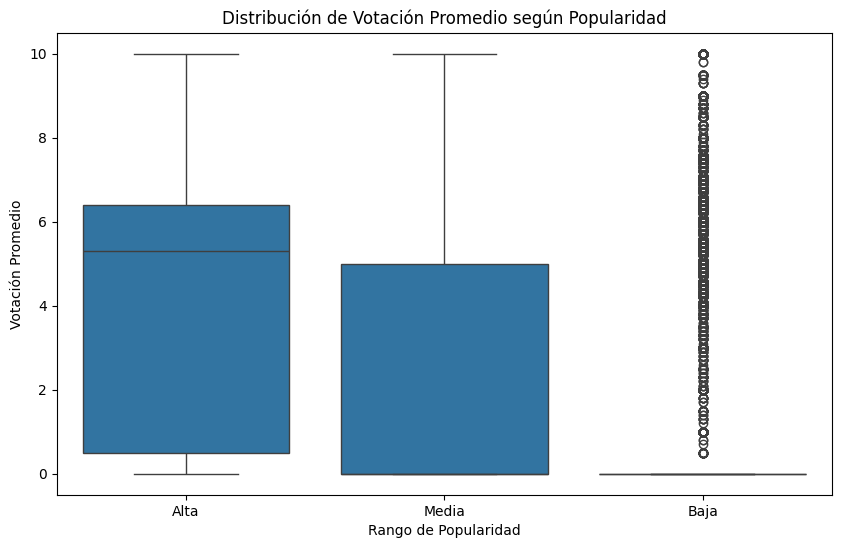

In [ ]:
# Graficar el boxplot con 'rango_popularidad' y 'VOTACIÓN PROMEDIO'
plt.figure(figsize=(10, 6))
sns.boxplot(x='rango_popularidad', y='VOTACIÓN PROMEDIO', data=df)
plt.title('Distribución de Votación Promedio según Popularidad')
plt.xlabel('Rango de Popularidad')
plt.ylabel('Votación Promedio')
plt.show()


##DIAGNOSTICO

Para esta sección, se procedió a realizar los gráficos, adecuándolos para que se pudieran observar las categorías de popularidad de manera clara y concisa.
En el paso 1 se usó límites fijos, pero resultó inadecuado debido a la distribución desbalanceada de los datos.
En cambio, en el paso 2, al usar percentiles, se logró una clasificación más representativa y balanceada para las categorías de popularidad.
Se llegaron a las siguientes conclusiones del caso, siendo la hipótesis parcialmente válida:
*   Las películas con mayor popularidad tienden a tener mejores votaciones promedio (con una mediana más alta). Esto sugiere que, aunque hay excepciones, el éxito comercial está asociado con la calidad percibida por los críticos en términos generales. Existe una desconexión entre popularidad y calificaciones en algunos casos (outliers y películas populares mal calificadas).
*   La mayoría de las películas con popularidad baja tienen calificaciones promedio cercanas a 0, lo que indica que no son consideradas "gemas ocultas" en términos generales.

#ANALISIS 4

##PREPARACION PARA EL ANALISIS

In [ ]:
# Filtrar los géneros de interés
genres_of_interest = ['Action', 'Adventure', 'Drama', 'Science Fiction']

df_filtered = df[(df['GÉNEROS'].isin(genres_of_interest)) & (df['INGRESOS'] > 0)]

# Agrupar por género y calcular la media de ingresos
genre_revenue = df_filtered.groupby('GÉNEROS')['INGRESOS'].mean().reset_index()

# Ordenar los géneros por ingresos promedio
genre_revenue = genre_revenue.sort_values('INGRESOS', ascending=False)


##GRAFICOS

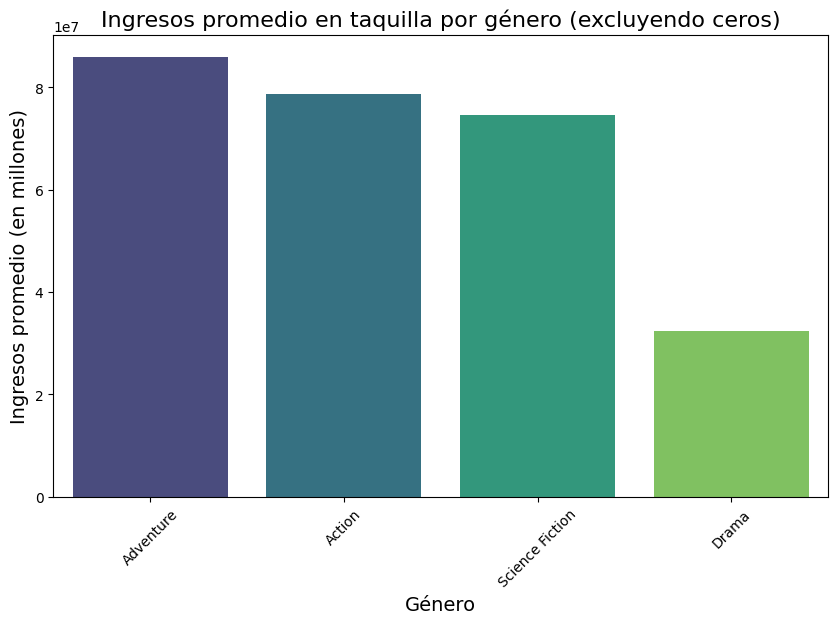

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='GÉNEROS', y='INGRESOS', data=genre_revenue, palette='viridis', hue='GÉNEROS', dodge=False)
plt.legend([], [], frameon=False)  # Elimina la leyenda
plt.title('Ingresos promedio en taquilla por género (excluyendo ceros)', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Ingresos promedio (en millones)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


##DIAGNOSTICO

Para un análisis más neutral, procedí a presentar en el análisis de géneros, a las películas cuyos ingresos fuesen distintos a cero.
Con esta premisa, vislumbré que la hipótesis se cumple parcialmente: si bien el genero de Acción genera más ingresos que Drama; Ciencia Ficción en realidad genera más ingresos que Action, lo que contradice la afirmación de que Acción y Aventura siempre generan más ingresos que Ciencia Ficción o Drama.

#RANDOM FOREST

Basandonos en la naturaleza del dataset (una filmografía con variables que abarcan desde información categórica –como género, director, país– como datos numéricos, como presupuestos y ratings), se selecciono este modelo de clasificacion.
Este modelo deberia predecir el "exito" de una pelicula, en terminos de Ingresos.

##PREPARACION PARA EL ANALISIS

In [ ]:
# 🔹 Calcular GANANCIAS
df["GANANCIAS"] = df["INGRESOS"] - df["PRESUPUESTO"]

# 🔹 Crear la columna CATEGORIA según los rangos de GANANCIAS
df["CATEGORIA DE EXITO"] = pd.cut(df["GANANCIAS"],
                         bins=[-float("inf"), 10_000_000, 100_000_000, float("inf")],
                         labels=[0, 1, 2])  # 0: Fracaso, 1: Éxito moderado, 2: Gran éxito

# Mostrar las primeras filas para ver la estructura del dataset
print(df.head())

   ID  PRESUPUESTO    IMDB_ID IDIOMA ORIGINAL   POPULARIDAD  \
0   1      4000000  tt0113101              en  1.698000e+03   
1   2            0  tt0107286              en  1.322870e+05   
2   3        42000  tt0825671              en  5.471600e-02   
3   4     11000000  tt0076759              en  1.049261e+07   
4   5     94000000  tt0266543              en  9.915573e+06   

  FECHA DE LANZAMIENTO   INGRESOS  DURACIÓN    ESTADO  \
0  1995-12-25 00:00:00    4300000      98.0  Released   
1  1993-10-15 00:00:00   12136938     110.0  Released   
2  2006-01-01 00:00:00          0      80.0  Released   
3  1977-05-25 00:00:00  775398007     121.0  Released   
4  2003-05-30 00:00:00  940335536     100.0  Released   

                    TÍTULO ORIGINAL  ...  Music  Mystery  Romance  \
0                        Four Rooms  ...      0        0        0   
1                    Judgment Night  ...      0        0        0   
2  Life in Loops (A Megacities RMX)  ...      0        0        0   
3 

##DEFINICION DE VARIABLES

In [ ]:
# Definir las columnas a excluir
columnas_excluir = ['ID', 'IMDB_ID', 'TÍTULO ORIGINAL', 'FECHA DE LANZAMIENTO', 'IDIOMA ORIGINAL', 'ESTADO']

# Definir X (características) e y (variable objetivo)
y = df["CATEGORIA DE EXITO"]  # Variable objetivo
X = df.drop(columns=["CATEGORIA DE EXITO"] + columnas_excluir, errors='ignore')  # Excluir columnas no deseadas

# FILTRAR SOLO LAS VARIABLES SELECCIONADAS POR SFS
X = X[['PRESUPUESTO', 'POPULARIDAD']]  # Aquí seleccionamos las variables óptimas


In [ ]:
print(df.columns)


Index(['ID', 'PRESUPUESTO', 'IMDB_ID', 'IDIOMA ORIGINAL', 'POPULARIDAD',
       'FECHA DE LANZAMIENTO', 'INGRESOS', 'DURACIÓN', 'ESTADO',
       'TÍTULO ORIGINAL', 'VOTACIÓN PROMEDIO', 'VOTOS',
       'NUMERO DE COMPAÑÍAS PRODUCTORAS', 'NUMERO DE IDIOMAS HABLADOS', '',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western', 'GANANCIAS', 'CATEGORIA DE EXITO'],
      dtype='object')


##MLB (MULTILABEL BINARIZER)

Debido a que existen miles de combinaciones de categorias unicas para el campo GENEROS, los separamos y creamos una columna por cada genero individual.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Cargar el dataset
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Dataset - VF 4.xlsx')

# Reemplazar valores nulos en GÉNEROS con una cadena vacía
df['GÉNEROS'] = df['GÉNEROS'].fillna("")

# Convertir la columna 'GÉNEROS' en listas separadas por '|'
df['GÉNEROS'] = df['GÉNEROS'].apply(lambda x: x.split('|'))

# Aplicar MultiLabelBinarizer
mlb = MultiLabelBinarizer()
generos_encoded = pd.DataFrame(mlb.fit_transform(df['GÉNEROS']), columns=mlb.classes_)

# Concatenar el dataset original con los géneros codificados
df = pd.concat([df, generos_encoded], axis=1)

# Eliminar la columna original de GÉNEROS
df.drop(columns=['GÉNEROS'], inplace=True)


Mounted at /content/drive


##VISUALIZACION DE DATASET

In [ ]:
pd.set_option('display.max_columns', None)
print(df.head())

   ID  PRESUPUESTO    IMDB_ID IDIOMA ORIGINAL   POPULARIDAD  \
0   1      4000000  tt0113101              en  1.698000e+03   
1   2            0  tt0107286              en  1.322870e+05   
2   3        42000  tt0825671              en  5.471600e-02   
3   4     11000000  tt0076759              en  1.049261e+07   
4   5     94000000  tt0266543              en  9.915573e+06   

  FECHA DE LANZAMIENTO   INGRESOS  DURACIÓN    ESTADO  \
0  1995-12-25 00:00:00    4300000      98.0  Released   
1  1993-10-15 00:00:00   12136938     110.0  Released   
2  2006-01-01 00:00:00          0      80.0  Released   
3  1977-05-25 00:00:00  775398007     121.0  Released   
4  2003-05-30 00:00:00  940335536     100.0  Released   

                    TÍTULO ORIGINAL  VOTACIÓN PROMEDIO  VOTOS  \
0                        Four Rooms                6.5    485   
1                    Judgment Night                6.5     69   
2  Life in Loops (A Megacities RMX)                6.4      4   
3                 

##IMPORTACION DE LIBRERIAS



In [ ]:
# Importar SFS y Árbol de Decisión
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

##DIVISION DE DATOS

In [ ]:

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



##DEFINICION DE MODELO

In [ ]:
#  Crear el modelo base (Random Forest)
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

#SFS (SEQUENTIAL FEATURE SELECTOR)

Se utiliza este metodo para seleccionar las caracteristicas de los datos con los que se entrenara al modelo.

In [ ]:
#Aplicar SFS para seleccionar las mejores características
sfs = SequentialFeatureSelector(modelo_rf, n_features_to_select=1, direction='forward')

##AJUSTAR SFS A LOS DATOS DE ENTRENAMIENTO

In [ ]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=1)

In [ ]:
#Filtrar datos con las mejores características
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

#ENTRENAMIENTO DEL MODELO

In [ ]:
# Entrenar el modelo con las características seleccionadas
modelo_rf.fit(X_train_sfs, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = modelo_rf.predict(X_test_sfs)

#ENTRENAMIENTO DEL MODELO CON SFS

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 📌 1️⃣ Cargar los datos y definir X, y
columnas_excluir = ['ID', 'IMDB_ID', 'TÍTULO ORIGINAL', 'FECHA DE LANZAMIENTO', 'IDIOMA ORIGINAL', 'ESTADO']
y = df["CATEGORIA DE EXITO"]
X = df.drop(columns=["CATEGORIA DE EXITO"] + columnas_excluir, errors='ignore')

# 📌 2️⃣ Filtrar las variables óptimas
X = X[['PRESUPUESTO', 'POPULARIDAD']]

# 📌 3️⃣ Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 📌 4️⃣ Definir y entrenar el modelo Random Forest antes de SFS
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=1)
modelo_rf.fit(X_train, y_train)

def evaluar_modelo(modelo, X, y):
    y_pred = modelo.predict(X)
    return {
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred, average='macro'),
        "Recall": recall_score(y, y_pred, average='macro'),
        "F1-score": f1_score(y, y_pred, average='macro'),
    }

# 📌 5️⃣ Evaluar el modelo antes de SFS
metricas_antes = evaluar_modelo(modelo_rf, X_test, y_test)

# 📌 6️⃣ Aplicar SFS asegurando que seleccione menos variables que las disponibles
num_features = max(1, min(1, X_train.shape[1]))  # Evita el error si hay pocas variables
sfs = SequentialFeatureSelector(modelo_rf, n_features_to_select=num_features, direction='forward')
sfs.fit(X_train, y_train)

# 📌 7️⃣ Obtener variables seleccionadas
selected_features = X_train.columns[sfs.get_support()]
print("Variables seleccionadas por SFS:", selected_features.tolist())

# 📌 8️⃣ Filtrar solo las variables seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# 📌 9️⃣ Entrenar un nuevo modelo con las variables seleccionadas
modelo_rf_sfs = RandomForestClassifier(n_estimators=100, random_state=1)
modelo_rf_sfs.fit(X_train_selected, y_train)

# 📌 🔟 Evaluar el modelo después de SFS
metricas_despues = evaluar_modelo(modelo_rf_sfs, X_test_selected, y_test)

# 📌 🔍 Comparar resultados
print("\nResultados antes de SFS:")
for k, v in metricas_antes.items():
    print(f"{k}: {v:.4f}")

print("\nResultados después de SFS:")
for k, v in metricas_despues.items():
    print(f"{k}: {v:.4f}")



Variables seleccionadas por SFS: ['PRESUPUESTO']

Resultados antes de SFS:
Accuracy: 0.9826
Precision: 0.5879
Recall: 0.5684
F1-score: 0.5777

Resultados después de SFS:
Accuracy: 0.9855
Precision: 0.5844
Recall: 0.4854
F1-score: 0.5046


In [ ]:
print(df.columns)


Index(['ID', 'PRESUPUESTO', 'IMDB_ID', 'IDIOMA ORIGINAL', 'POPULARIDAD',
       'FECHA DE LANZAMIENTO', 'INGRESOS', 'DURACIÓN', 'ESTADO',
       'TÍTULO ORIGINAL', 'VOTACIÓN PROMEDIO', 'VOTOS',
       'NUMERO DE COMPAÑÍAS PRODUCTORAS', 'NUMERO DE IDIOMAS HABLADOS', '',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')


Los resultados muestran una alta precisión global (98.55%), pero los valores de precisión, recall y F1-score son relativamente bajos, lo que sugiere que el modelo no está equilibrando bien todas las clases.
Se procede a instigar cuantos ejemplos hay por clase en %.

<ipython-input-48-500c9138f006>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


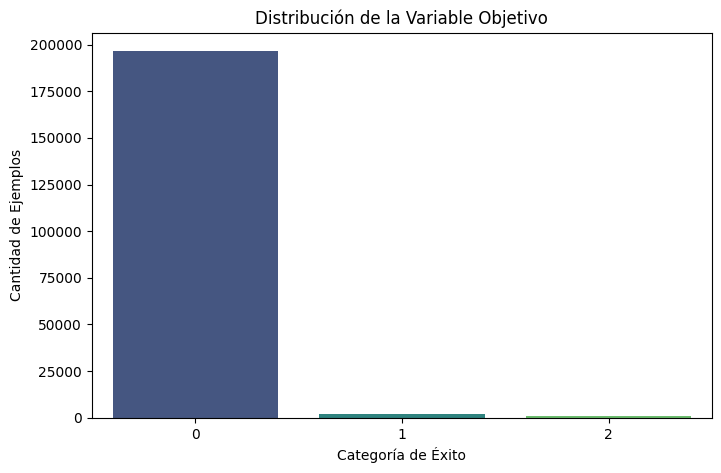

CATEGORIA DE EXITO
0    98.495943
1     1.036451
2     0.467606
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar valores por categoría
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette="viridis")
plt.title("Distribución de la Variable Objetivo")
plt.xlabel("Categoría de Éxito")
plt.ylabel("Cantidad de Ejemplos")
plt.show()

# Mostrar el conteo numérico
print(y.value_counts(normalize=True) * 100)  # Para ver los porcentajes


El dataset está extremadamente desbalanceado. El 98% de los datos están en la categoría 0.
En primer lugar, se procede a aplicar la tecnica SMOTE (Synthetic Minority Over-sampling Technique) para generar más datos de las clases minoritarias.

##COMPARACION DE TODAS LAS VARIABLES DE METRICAS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 📌 1️⃣ Cargar los datos y definir X, y
columnas_excluir = ['ID', 'IMDB_ID', 'TÍTULO ORIGINAL', 'FECHA DE LANZAMIENTO', 'IDIOMA ORIGINAL', 'ESTADO']
y = df["CATEGORIA DE EXITO"]
X = df.drop(columns=["CATEGORIA DE EXITO"] + columnas_excluir, errors='ignore')

# 📌 2️⃣ Definir diferentes combinaciones de variables
variables = {
    "Presupuesto": ['PRESUPUESTO'],
    "Popularidad": ['POPULARIDAD'],
    "Ambas": ['PRESUPUESTO', 'POPULARIDAD']
}

# 📌 3️⃣ Función para entrenar y evaluar modelos
def entrenar_evaluar(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    modelo = RandomForestClassifier(n_estimators=100, random_state=1)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-score": f1_score(y_test, y_pred, average='macro')
    }

# 📌 4️⃣ Evaluar cada conjunto de variables
resultados = {}
for nombre, vars in variables.items():
    print(f"Entrenando modelo con: {nombre}")
    resultados[nombre] = entrenar_evaluar(X[vars], y)

# 📌 5️⃣ Mostrar los resultados
import pandas as pd
resultados_df = pd.DataFrame(resultados).T
print("\nComparación de métricas:")
print(resultados_df)


Entrenando modelo con: Presupuesto
Entrenando modelo con: Popularidad
Entrenando modelo con: Ambas

Comparación de métricas:
             Accuracy  Precision    Recall  F1-score
Presupuesto  0.985541   0.584386  0.485412  0.504553
Popularidad  0.980705   0.530488  0.526886  0.528530
Ambas        0.982584   0.587892  0.568391  0.577715


##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
import pandas as pd

print(pd.Series(y_resampled).value_counts(normalize=True))  # Proporción de cada clase

CATEGORIA DE EXITO
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hacer predicciones con el modelo entrenado
y_pred = modelo_rf.predict(X_test)

# Evaluar rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Mostrar resultados
print(f"📊 Accuracy: {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔁 Recall: {recall:.4f}")
print(f"📏 F1-score: {f1:.4f}")


📊 Accuracy: 0.9826
🎯 Precision: 0.5879
🔁 Recall: 0.5684
📏 F1-score: 0.5777


Hubo una mejora en general pero no fue sustancial.

El modelo tiene una alta precisión global (98.43%), pero las métricas de precisión (58.81%), recall (56.68%) y F1-score (57.70%) son bajas en comparación.
Por lo cual, se procede a revisar la distribucion de clases.

#ANALISIS

##DISTRIBUCION DE CLASES

In [ ]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{0: 157220, 1: 1654, 2: 747}


Con este codigo, se comprueba que los datos estan fuertemente desbalanceados. Acompanado de los problemas que arrojaran en las metricas.

##DE ERRORES CON MATRIZ DE CONFUSION

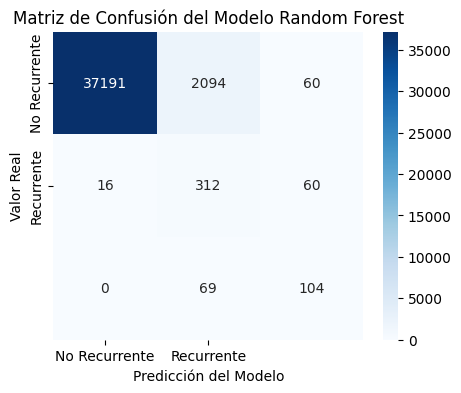

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Sustituir 'y_test' y 'y_pred' con los valores reales del modelo
cm = confusion_matrix(y_test, y_pred)

# Crear la visualización de la Matriz de Confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Recurrente", "Recurrente"], yticklabels=["No Recurrente", "Recurrente"])
plt.xlabel("Predicción del Modelo")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión del Modelo Random Forest")
plt.show()

Segun esta matriz, el modelo es bastante bueno para predecir clientes no recurrentes: tiene un alto número de Verdaderos Negativos (37191) y un bajo número de Falsos Negativos (16).
El modelo tiene más dificultades para predecir clientes recurrentes: si bien tiene un número aceptable de Verdaderos Positivos (312), también tiene un número relativamente alto de Falsos Positivos (2094). Esto sugiere que a veces con clientes que no recurrieron, el modelo predijo que si recurririan.

##VALIDACION CRUZADA

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo Random Forest
modelo_rf_cv = RandomForestClassifier(n_estimators=100, random_state=42)

# Aplicar validación cruzada con 5 folds
cv_scores = cross_val_score(modelo_rf_cv, X, y, cv=5, scoring='accuracy')

# Mostrar los resultados
print("Resultados de la Validación Cruzada (5-Fold):")
print(f"Accuracy por fold: {cv_scores}")
print(f"Accuracy promedio: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")


Resultados de la Validación Cruzada (5-Fold):
Accuracy por fold: [0.93848043 0.98629279 0.98574114 0.98684375 0.98902393]
Accuracy promedio: 0.9773
Desviación estándar: 0.0194


Esta prueba de validacion arroja los siguientes resultados:

*   Precisión alta: Con un promedio de 97.73%, el modelo parece generalizar bien.
*   Baja variabilidad: La desviación estándar de 0.0194 indica que el rendimiento es consistente entre los diferentes folds.
* Fold más bajo: El valor más bajo de precisión es 0.9385, lo que sugiere que podría haber cierta variabilidad en los datos o en la partición de los folds.




##VISUALIZACION DEL ARBOL DE DECISION EN RANDOM FOREST

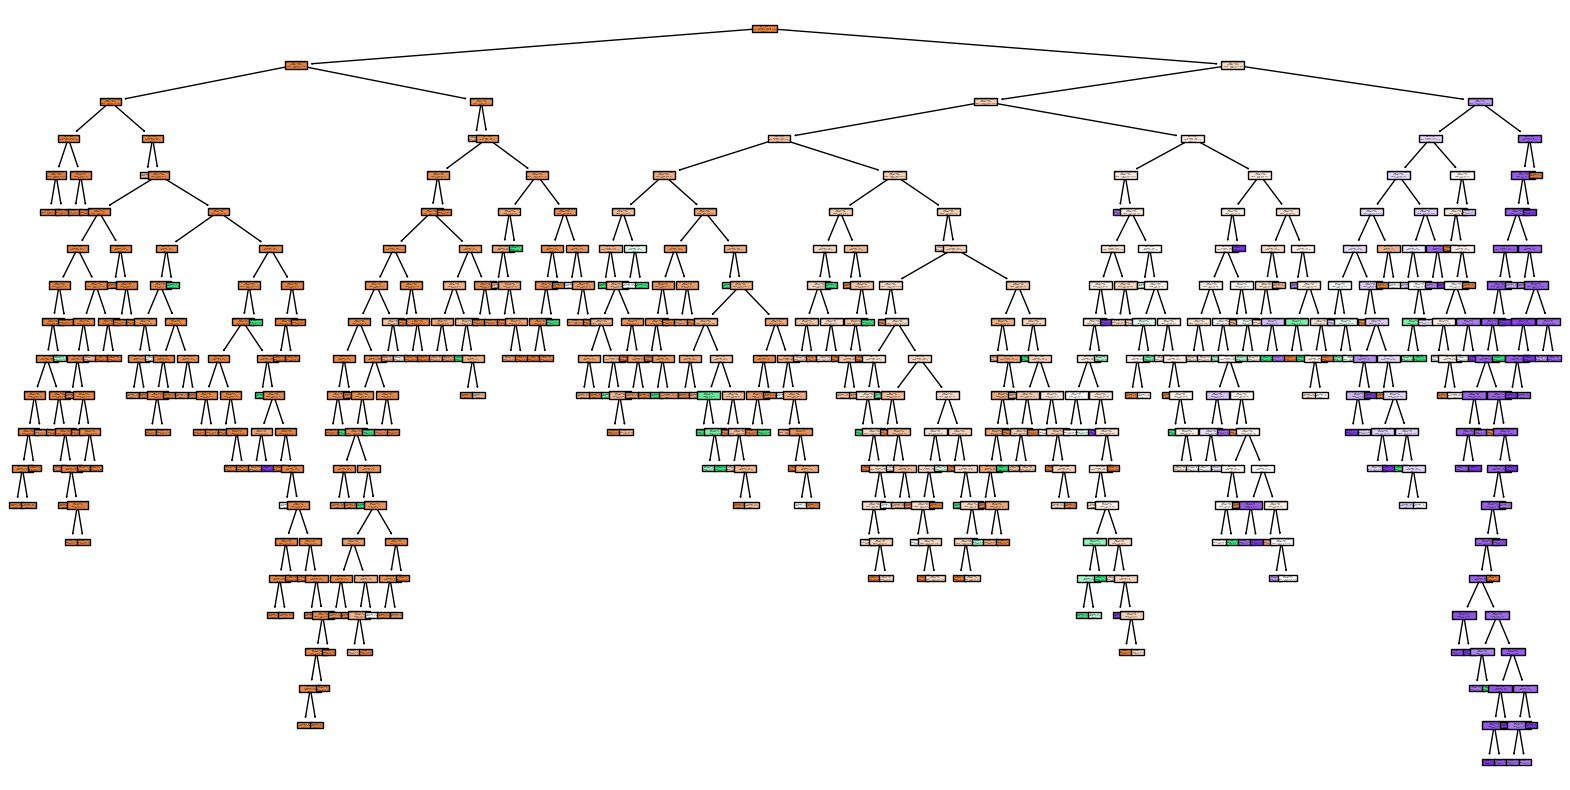

In [ ]:
qimport matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extraer un árbol del Random Forest
tree_model = modelo_rf.estimators_[0]

# Graficar el árbol con las clases correctas
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=[str(c) for c in modelo_rf.classes_])
plt.show()


# CONCLUSIONES

##COMPARACION DEL MODELO, ANTES Y DESPUES DE APLICAR SFS



*   El SFS ha contemplado a la varible PRESUPUESTO, descartando POPULARIDAD, considerandola de mayor importancia en el analisis predictivo de la clasificacion de CATEGORIA DE EXITO de una pelicula
*   ACCURACY & PRECISION: se mantienen inalterables
*   RECALL & F1-SCORE: se reducen de manera considerable, por lo cual, el modelo pasaria a omitir mas casos positivos




##COMPARACION DE APLICAR SFS A DISTINTOS TIPOS DE METRICAS

Si bien el modelo se entreno considerando la metrica que considero mas apropiada (PRESUPUESTO), se analizo por separado la combinacion de metricas y sus resultados consecuentes.

*   Consideramos que ha elegido PRESUPUESTO como la unica metrica para el modelo de prediccion debido a que cuenta con el mejor accuracy
*   En segundo puesto, una combinacion de ambas (PRESUPUESTO + POPULARIDAD), equilibraria las predicciones (mejorando recall y F1-score)



#RESUMEN

El sistema de prediccion dista de ser el mejor. Aunque el accuracy sea alto, eso no significa que el modelo haga buenas predicciones en todas las clases, sino en la mayoria de datos que pertenecen a una clase dominante (en el caso del dataset, a la categoria de exito 0).
Sugiero aumentar la cantidad de datos de las clases minoritarias de categoria de exito 1 y 2 en el dataset. Luego volver a realizar los analisis pertinentes. Esto deberia mejorar el balance del dataset y perfeccionar el modelo predictivo.